# Project Luther: Soccer Players Values

Elvis Davalillo - info@elvisdavalillo.com

Part 2/2 - Exploratory data analysis and linear regression modeling for soccer players data

Process: 
    
    1.Exploratory Data Analysis 
    2.Regression Modeling
    3.Predicting Real Test Cases

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
%matplotlib inline

## Exploratory Data Analysis

In [2]:
# Load data
full_data = pd.read_csv('full_data.csv')

In [3]:
full_data.describe()

,ID,Age,Overall,Potential,Value,Salary,Acceleration,Aggression,Agility,Balance,...,Reactions,Short Passing,Shot Power,Sliding Tackle,Sprint Speed,Stamina,Standing Tackle,Strength,Vision,Volleys
count,1995.000000,1995.000000,1995.000000,1995.000000,1.995000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,...,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,204063.519799,24.898747,72.331328,77.710276,8.200301e+06,37019.047619,65.372431,60.019048,64.603008,64.332832,...,68.455639,64.478697,60.973434,50.541353,65.593484,64.084211,52.910276,66.802005,59.017043,47.990977
std,42252.674076,5.041132,8.052174,5.695224,1.191570e+07,50228.221757,14.740114,18.706990,14.395502,14.564301,...,10.170434,16.346177,18.522230,24.140006,14.625230,16.105343,24.233991,12.212281,15.796338,20.006892
min,185.000000,16.000000,47.000000,52.000000,0.000000e+00,0.000000,13.000000,11.000000,0.000000,0.000000,...,33.000000,11.000000,11.000000,0.000000,14.000000,15.000000,9.000000,24.000000,0.000000,0.000000
25%,189708.000000,21.000000,66.000000,74.000000,8.000000e+05,6000.000000,56.000000,47.000000,56.000000,55.500000,...,62.000000,58.000000,51.000000,26.000000,58.000000,55.000000,29.000000,60.000000,48.000000,33.000000
50%,211068.000000,24.000000,74.000000,78.000000,4.400000e+06,21000.000000,68.000000,64.000000,67.000000,66.000000,...,70.000000,69.000000,65.000000,58.000000,68.000000,67.000000,61.000000,68.000000,61.000000,50.000000
75%,233358.500000,29.000000,78.000000,82.000000,1.050000e+07,46000.000000,76.000000,75.000000,75.000000,75.000000,...,76.000000,76.000000,76.000000,72.000000,76.000000,75.500000,74.000000,76.000000,72.000000,64.000000
max,248710.000000,43.000000,94.000000,94.000000,1.105000e+08,565000.000000,97.000000,93.000000,95.000000,96.000000,...,96.000000,93.000000,95.000000,90.000000,96.000000,97.000000,93.000000,95.000000,94.000000,90.000000


In [4]:
#Let's convert the Value column into thousands for easier readibility
full_data['Value'] = full_data['Value']/1000

In [5]:
# Let's find the 25 features with the highest correlation to player value
correlation = full_data.corr().sort_values('Value',ascending = False)
correlation

,ID,Age,Overall,Potential,Value,Salary,Acceleration,Aggression,Agility,Balance,...,Reactions,Short Passing,Shot Power,Sliding Tackle,Sprint Speed,Stamina,Standing Tackle,Strength,Vision,Volleys
Value,-0.080795,0.162256,0.712296,0.683933,1.000000,0.863738,0.277979,0.213273,0.310319,0.191868,...,0.647443,0.381034,0.327433,0.086459,0.280381,0.363052,0.108062,0.228614,0.440124,0.330590
Salary,-0.210579,0.285932,0.679704,0.572249,0.863738,1.000000,0.222954,0.255992,0.274483,0.173426,...,0.628520,0.377549,0.334106,0.134610,0.231035,0.326644,0.154444,0.242052,0.420402,0.329492
Overall,-0.420054,0.578930,1.000000,0.671814,0.712296,0.679704,0.229921,0.427412,0.314039,0.145280,...,0.912864,0.514266,0.445445,0.246517,0.247645,0.433355,0.270048,0.447346,0.532002,0.382652
Potential,0.044765,-0.079749,0.671814,1.000000,0.683933,0.572249,0.305809,0.216681,0.296842,0.181669,...,0.577544,0.390174,0.289662,0.153107,0.307939,0.334963,0.168797,0.198279,0.393176,0.257979
Reactions,-0.426203,0.567907,0.912864,0.577544,0.647443,0.628520,0.245503,0.457918,0.324924,0.182683,...,1.000000,0.540947,0.466861,0.258967,0.255139,0.459535,0.285338,0.405769,0.550073,0.422368
Composure,0.099590,0.171105,0.562160,0.438033,0.488234,0.449171,0.308173,0.382550,0.372088,0.266893,...,0.534378,0.507763,0.430628,0.266835,0.319847,0.495698,0.286953,0.240387,0.476860,0.380316
Vision,-0.181104,0.230705,0.532002,0.393176,0.440124,0.420402,0.465777,0.321706,0.627342,0.544871,...,0.550073,0.743900,0.700715,0.135825,0.423912,0.532948,0.178871,0.023399,1.000000,0.732240
Short Passing,-0.129731,0.175274,0.514266,0.390174,0.381034,0.377549,0.558141,0.666011,0.600338,0.550948,...,0.540947,1.000000,0.817204,0.531846,0.558198,0.763146,0.574289,0.227514,0.743900,0.733711
Long Passing,-0.172006,0.234795,0.520185,0.362333,0.371369,0.377598,0.423631,0.637254,0.511154,0.471172,...,0.529625,0.895659,0.720149,0.593546,0.421234,0.678445,0.630634,0.206043,0.738413,0.595960
Stamina,0.064133,0.049533,0.433355,0.334963,0.363052,0.326644,0.642241,0.661365,0.593569,0.519744,...,0.459535,0.763146,0.673693,0.552853,0.672163,1.000000,0.582479,0.294320,0.532948,0.576548


### Let's understand the Value of the players we want to predict

In [6]:
# Let's start with average values by age
value_age = full_data.groupby(['Age'])['Value'].mean().reset_index()

In [7]:
#% Let's remove players with more older than 36 years old, they are likely retired
# Players under 18 are usually in trainig so they don't play frequently

value_age = value_age[(value_age['Age'] >= 18)&(value_age['Age'] <= 36)] 

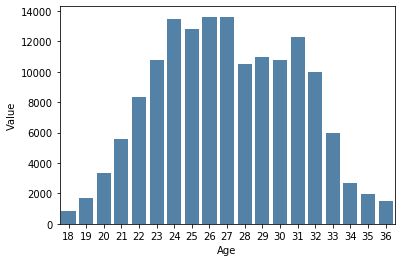

In [8]:
sns.barplot(x = 'Age',y='Value',data=value_age, color='steelblue')

In [9]:
value_age_leagues = full_data.groupby(['League','Age'])['Value'].mean().reset_index().sort_values('Age',ascending = False)

In [10]:
#% Let's remove players with more older than 36 years old, they are likely retired
# Players under 18 are usually in trainig so they don't play frequently

value_age_leagues = value_age_leagues[(value_age_leagues['Age'] >= 18)&(value_age_leagues['Age'] <= 36)] 

Text(0.5, 1, 'Average Player Values by League')

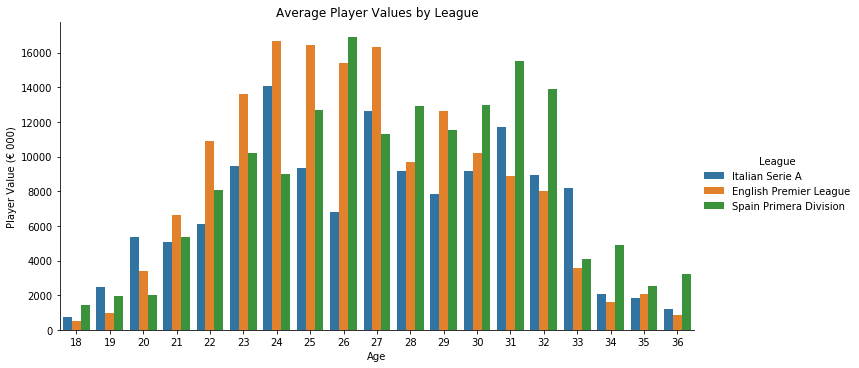

In [11]:
age_leagues_bar = sns.catplot('Age', 'Value', hue ='League', kind = 'bar', \
                          data = value_age_leagues, aspect = 2)
#plt.xticks(rotation=45)
plt.xlabel('Age')
plt.ylabel('Player Value (€ 000)')
plt.title("Average Player Values by League")

In [12]:
# Let's group age so we can plot them in a simplified way
age_grouped = pd.read_csv('age_groups.csv')

In [13]:
full_data = pd.merge(full_data,age_grouped [['Age','Age Group']],on='Age', how='left')

In [14]:
value_age_groups_leagues = full_data.groupby(['League','Age Group'])['Value'].mean().reset_index()

In [15]:
mask = ((value_age_groups_leagues["Age Group"] != "16-17") & 
        (value_age_groups_leagues["Age Group"] != "36-38") & 
        (value_age_groups_leagues["Age Group"] != "39-41") & 
        (value_age_groups_leagues["Age Group"] != "42-43"))

In [16]:
value_age_groups_leagues = value_age_groups_leagues[mask]

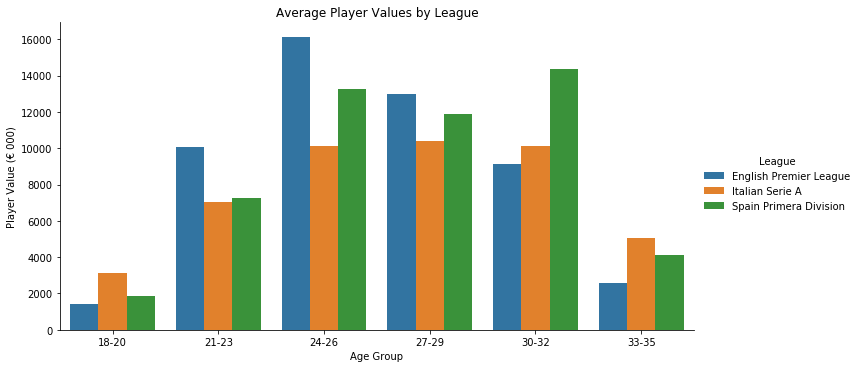

In [17]:
order = ['18-20', '21-23', '24-26', '27-29', '30-32', '33-35']

age_grouped_leagues_bar = sns.catplot('Age Group', 'Value', hue ='League', kind = 'bar', \
                          data = value_age_groups_leagues, aspect = 2, order=order)

#plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Player Value (€ 000)')
plt.title("Average Player Values by League")
age_grouped_leagues_bar.savefig('daily_traffic.svg')

In [18]:
# Let's continue with average player values by league
value_league = full_data.groupby(['League'])['Value'].mean().reset_index().sort_values('Value',ascending = False)

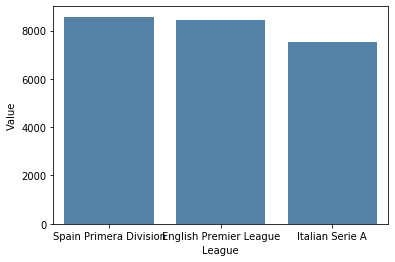

In [19]:
sns.barplot(x = 'League',y='Value',data=value_league, color='steelblue')

In [20]:
# Let's continue with average values by position by league
value_positions = full_data.groupby(['Position'])['Value'].mean().reset_index().sort_values('Value',ascending = False)

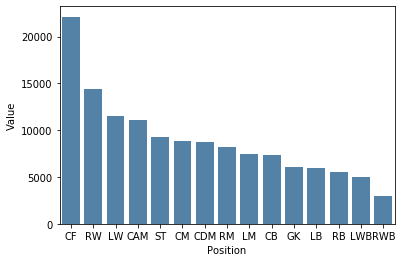

In [21]:
sns.barplot(x = 'Position',y='Value',data=value_positions, color='steelblue')

In [22]:
# Let's group the positions so we can plot them by league
grouped_positions = pd.read_csv('positions.csv')

In [23]:
grouped_positions.columns

Index(['Position', 'Group'], dtype='object')

In [24]:
full_data = pd.merge(full_data,grouped_positions[['Position','Group']],on='Position', how='left')

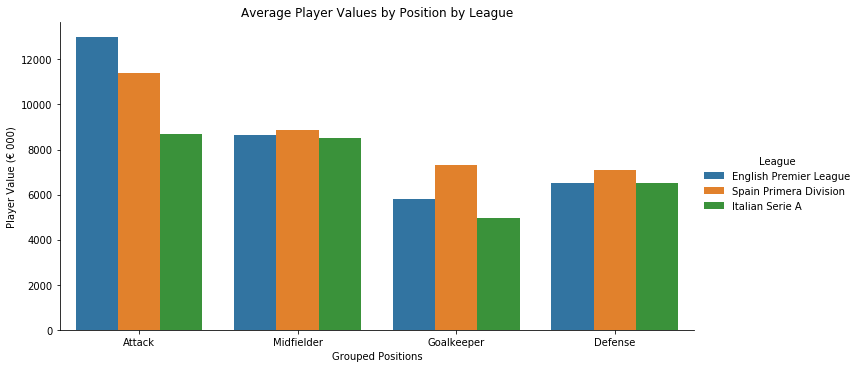

In [25]:
value_grouped_positions = full_data.groupby(['League','Group'])['Value'].mean().reset_index().sort_values('Value',ascending = False)

grouped_bar = sns.catplot('Group', 'Value', hue ='League', kind = 'bar', \
                          data = value_grouped_positions, aspect = 2)
#plt.xticks(rotation=45)
plt.xlabel('Grouped Positions')
plt.ylabel('Player Value (€ 000)')
plt.title("Average Player Values by Position by League")
grouped_bar.savefig('grouped_bar.svg')

In [26]:
# Let's group the skills to graph them in a simpler way
attacking = ['Crossing','Finishing','Heading Accuracy','Short Passing','Volleys']
skill = ['Dribbling','Curve','FK Accuracy','Long Passing','Ball Control']
movement = ['Acceleration','Sprint Speed','Agility','Reactions','Balance']
power = ['Shot Power', 'Jumping','Stamina','Strength','Long Shots']
mentality = ['Aggression','Interceptions','Positioning','Vision','Penalties','Composure']
defending = ['Marking','Standing Tackle','Sliding Tackle']
goalkeeping = ['GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes']

In [27]:
full_data['Attacking'] = full_data[attacking].mean(axis=1)
full_data['Skill'] = full_data[skill].mean(axis=1)
full_data['Movement'] = full_data[movement].mean(axis=1)
full_data['Power'] = full_data[power].mean(axis=1)
full_data['Mentality'] = full_data[mentality].mean(axis=1)
full_data['Defending'] = full_data[defending].mean(axis=1)
full_data['Goalkeeping'] = full_data[goalkeeping].mean(axis=1)

In [28]:
skills_table = pd.read_csv('skills_table.csv')

In [29]:
skills_table =skills_table [['League','Skills Group','Skill Score']]

(50, 69.26583615)

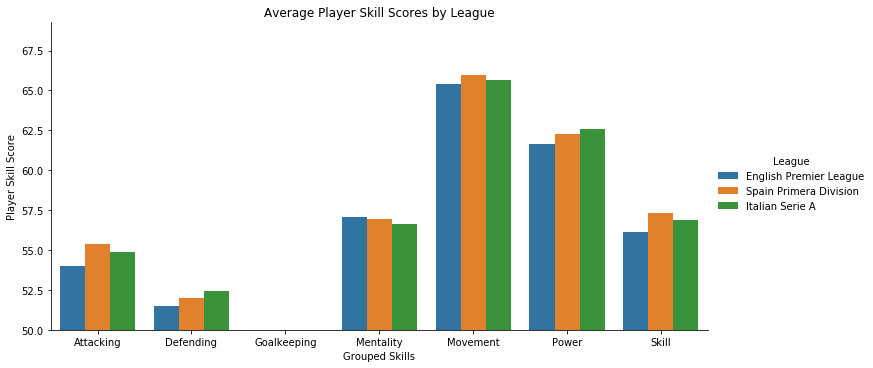

In [30]:
skills_bar = sns.catplot('Skills Group', 'Skill Score', hue ='League', kind = 'bar', \
                          data = skills_table , aspect = 2)
#plt.xticks(rotation=45)
plt.xlabel('Grouped Skills')
plt.ylabel('Player Skill Score')
plt.title("Average Player Skill Scores by League")
plt.ylim(bottom=50)

### Create a baseline model

In [31]:
#Let's create a baseline model with the 25 features with the highest correlation to value.
# Salary is excluded to avoid the correlation with Value
# Overall and Potential are excluded because they depend on other features ("Correlated")
small_df = full_data.loc[:,['ID','Name','Age','Country','Position','Team','League','Value','Salary',
                            'Reactions','Composure','Vision','Short Passing', 'Long Passing',
                            'Stamina','Ball Control','Shot Power','Volleys','Long Shots',
                            'Curve','Finishing','FK Accuracy','Dribbling','Positioning','Agility',
                            'Penalties', 'Crossing','Acceleration','Sprint Speed','Strength',
                            'Aggression','Heading Accuracy','Jumping']]

In [32]:
# let's remove players with zero market values
small_df = small_df[small_df.Value != 0]

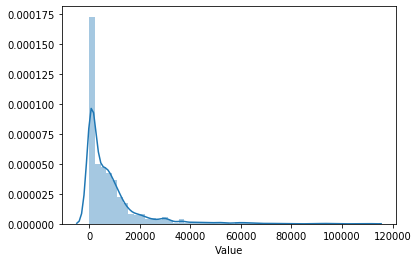

In [33]:
# Let's understand the Value of the player we want to predict
sns.distplot(small_df['Value'])

In [34]:
# some players make little money and some player make a lot, let's convert Value to Log_Value to minimize the effect of them
small_df['Log_Value'] = small_df['Value'].apply(lambda x: np.log(x))

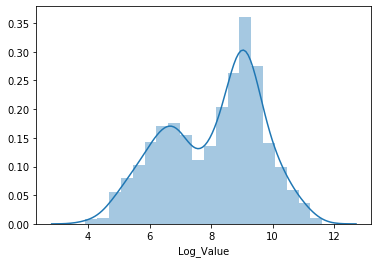

In [35]:
sns.distplot(small_df['Log_Value'])

### Simple Validation Method: Train / Validation / Test

In [36]:
#Separate our features from our target
X = small_df.loc[:,['Age','Reactions','Composure','Vision','Short Passing', 'Long Passing',
                    'Stamina','Shot Power','Volleys','Ball Control','Long Shots',
                    'Curve','Finishing','FK Accuracy','Dribbling','Positioning','Agility',
                    'Penalties', 'Crossing','Acceleration','Sprint Speed','Strength',
                   'Aggression','Heading Accuracy','Jumping']]

y = small_df['Log_Value']

In [37]:
# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [38]:
#further partition X, y into datasets X_train, y_train (60% of original) and X_val, y_val (20%).
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [39]:
print(X_train.shape, X_val.shape, X_test.shape)

(1173, 25) (392, 25) (392, 25)


In [40]:
#set up the baseline model:
lm = LinearRegression()  

In [41]:
def linear_regression_fit_score (X_train,X_val,y_train,y_val):
    """
    Fit and score a linear regression model between the training and validation data sets
    
    """ 
    #fit
    lm.fit(X_train, y_train)
    
    #validate
    print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
    print (f'Linear Regression train Adjusted R^2: {1 - (1-lm.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1):.3f}')
    print("")
    print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')
    print (f'Linear Regression val Adjusted R^2: {1 - (1-lm.score(X_val, y_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1):.3f}')
    print("")

In [42]:
linear_regression_fit_score (X_train,X_val,y_train,y_val)

Linear Regression train R^2: 0.835
Linear Regression train Adjusted R^2: 0.832

Linear Regression val R^2: 0.818
Linear Regression val Adjusted R^2: 0.806



Conclusion : The highest R^2 in the training in comparison with the validation step suggests that the model might be slightly overfitted. Let's add some complexity to improve predictability

In [43]:
pred_train = lm.predict(X_train)
pred_val = lm.predict(X_val)

In [44]:
def residual_plots (X_train,X_val,y_train,y_val):
    """
    Plot the residuals between the model prediction and the original values in the training and validation
    samples
    
    """
    plt.figure(figsize=[16,4])

    plt.suptitle('Residual Plots',fontsize = 16)

    plt.subplot(1,2,1)
    plt.scatter(lm.predict(X_train), lm.predict(X_train)- y_train,c = 'b',s = 40, alpha = 0.3)
    plt.hlines (y=0, xmin=3, xmax = 12)
    plt.title ('Training Set')
    plt.ylabel ('Residuals')
    plt.xlabel ('Predicted Values')

    plt.subplot(1,2,2)
    plt.scatter(lm.predict(X_val),lm.predict(X_val)-y_val, c='k', s=40,alpha = 0.3)
    plt.hlines (y=0, xmin=3, xmax = 12)
    plt.title ('Validation Set')
    plt.ylabel ('Residuals')
    plt.xlabel ('Predicted Values')

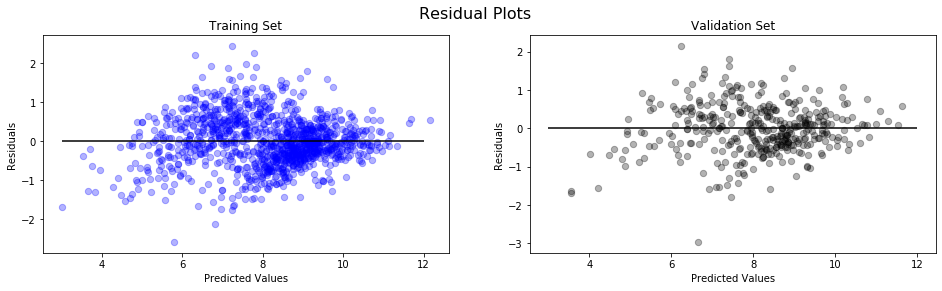

In [45]:
residual_plots (X_train,X_val,y_train,y_val)

### Adding Complexity to the Baseline Model

#### Let's start adding categorical features, starting with League

In [46]:
small_df['League'].value_counts()

English Premier League    701
Spain Primera Division    660
Italian Serie A           596
Name: League, dtype: int64

In [47]:
X2 = small_df.loc[:,['Age','Reactions','Composure','Vision','Short Passing', 'Long Passing',
                    'Stamina','Shot Power','Volleys','Ball Control','Long Shots',
                    'Curve','Finishing','FK Accuracy','Dribbling','Positioning','Agility',
                    'Penalties', 'Crossing','Acceleration','Sprint Speed','Strength',
                   'Aggression','Heading Accuracy','Jumping']]

y = small_df['Log_Value']

In [48]:
X2['League'] = small_df['League']

In [49]:
X2 = pd.get_dummies(X2)

In [50]:
X2.shape

(1957, 28)

In [51]:
# hold out 20% of the data for final testing
X2, X2_test, y, y_test = train_test_split(X2, y, test_size=.2, random_state=10)

In [52]:
#further partition X, y into datasets X_train, y_train (60% of original) and X_val, y_val (20%).
X2_train, X2_val, y_train, y_val = train_test_split(X2, y, test_size=.25, random_state=3)

In [53]:
print(X2_train.shape, X2_val.shape, X2_test.shape)

(1173, 28) (392, 28) (392, 28)


In [54]:
#set up the  model:
lm = LinearRegression()     

In [55]:
#fit and validate
linear_regression_fit_score (X2_train,X2_val,y_train,y_val)

Linear Regression train R^2: 0.836
Linear Regression train Adjusted R^2: 0.832

Linear Regression val R^2: 0.819
Linear Regression val Adjusted R^2: 0.805



Conclusion : The R^2 and Adjusted R^2 increased for the training set. However for the val set the decresed indicating that this might not be the best model and might be sligthly overfitted and the model is not improving.

In [56]:
pred_train = lm.predict(X2_train)
pred_val = lm.predict(X2_val)

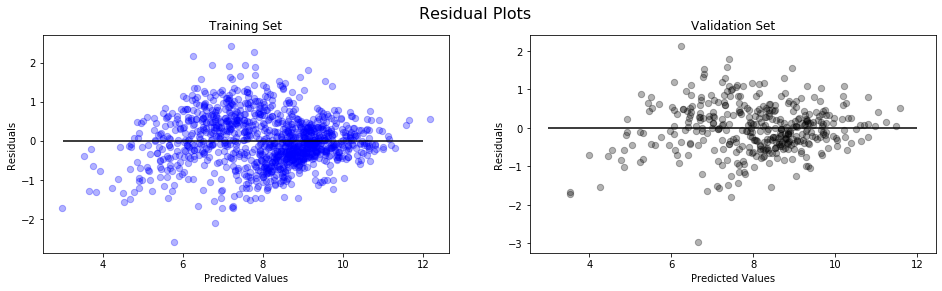

In [57]:
residual_plots (X2_train,X2_val,y_train,y_val)

### What if we create a model for each league

#### Starting with the English Premier League

In [203]:
premier_df = small_df[small_df.League == "English Premier League"] 

In [204]:
#Separate our features from our target
X = premier_df.loc[:,['Age','Reactions','Composure','Vision','Short Passing', 'Long Passing',
                    'Stamina','Shot Power','Volleys','Ball Control','Long Shots',
                    'Curve','Finishing','FK Accuracy','Dribbling','Positioning','Agility',
                    'Penalties', 'Crossing','Acceleration','Sprint Speed','Strength',
                   'Aggression','Heading Accuracy','Jumping']]

y = premier_df['Log_Value']

In [205]:
# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [206]:
#further partition X, y into datasets X_train, y_train (60% of original) and X_val, y_val (20%).
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [207]:
print(X_train.shape, X_val.shape, X_test.shape)

(420, 25) (140, 25) (141, 25)


In [208]:
#set up the baseline model:

lm = LinearRegression()  

In [209]:
#fit and validate
linear_regression_fit_score (X_train,X_val,y_train,y_val)

Linear Regression train R^2: 0.884
Linear Regression train Adjusted R^2: 0.877

Linear Regression val R^2: 0.887
Linear Regression val Adjusted R^2: 0.863



The scores for the UK model are significantly higher than for the general model predict player values, 
which suggests that the creation of a model for each league increases predictability.

In [210]:
pred_train = lm.predict(X_train)
pred_val = lm.predict(X_val)

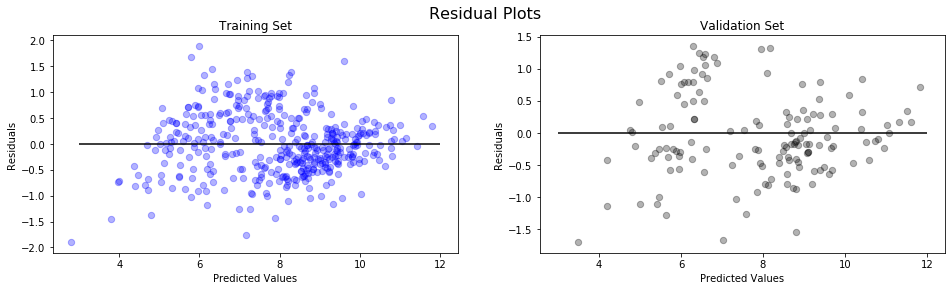

In [211]:
residual_plots (X_train,X_val,y_train,y_val)

##### Let's increase complexity adding categorical variables

An iteration modelling process to choose the best categorical features was performed (not in this notebook),
the only categorical features that increased the predictability of the model were Positions

In [212]:
premier_df['Position'].value_counts()

CB     137
CM      96
ST      92
GK      80
LB      50
CDM     46
RB      45
CAM     37
LM      35
RM      28
RW      17
LW      15
CF       8
RWB      8
LWB      7
Name: Position, dtype: int64

In [213]:
X2 =  premier_df.loc[:,['Age','Reactions','Composure','Vision','Short Passing', 'Long Passing',
                    'Stamina','Shot Power','Volleys','Ball Control','Long Shots',
                    'Curve','Finishing','FK Accuracy','Dribbling','Positioning','Agility',
                    'Penalties', 'Crossing','Acceleration','Sprint Speed','Strength',
                   'Aggression','Heading Accuracy','Jumping']]
y = premier_df['Log_Value']

In [214]:
X2['Position'] = premier_df['Position']

In [215]:
X2 = pd.get_dummies(X2)

In [216]:
# hold out 20% of the data for final testing
X2, X2_test, y, y_test = train_test_split(X2, y, test_size=.2, random_state=10)

In [217]:
#further partition X, y into datasets X_train, y_train (60% of original) and X_val, y_val (20%).
X2_train, X2_val, y_train, y_val = train_test_split(X2, y, test_size=.25, random_state=3)

In [218]:
print(X2_train.shape, X2_val.shape, X2_test.shape)

(420, 40) (140, 40) (141, 40)


In [219]:
X2_train.columns

Index(['Age', 'Reactions', 'Composure', 'Vision', 'Short Passing',
       'Long Passing', 'Stamina', 'Shot Power', 'Volleys', 'Ball Control',
       'Long Shots', 'Curve', 'Finishing', 'FK Accuracy', 'Dribbling',
       'Positioning', 'Agility', 'Penalties', 'Crossing', 'Acceleration',
       'Sprint Speed', 'Strength', 'Aggression', 'Heading Accuracy', 'Jumping',
       'Position_CAM', 'Position_CB', 'Position_CDM', 'Position_CF',
       'Position_CM', 'Position_GK', 'Position_LB', 'Position_LM',
       'Position_LW', 'Position_LWB', 'Position_RB', 'Position_RM',
       'Position_RW', 'Position_RWB', 'Position_ST'],
      dtype='object')

In [220]:
#set up the  model:
lm = LinearRegression()

In [221]:
#fit and validate
linear_regression_fit_score (X2_train,X2_val,y_train,y_val)

Linear Regression train R^2: 0.910
Linear Regression train Adjusted R^2: 0.900

Linear Regression val R^2: 0.919
Linear Regression val Adjusted R^2: 0.886



In [222]:
pred_train = lm.predict(X2_train)
pred_val = lm.predict(X2_val)
pred_test = lm.predict(X2_test)

In [223]:
coefficients_uk = pd.DataFrame(zip(X2_train.columns,lm.coef_),columns =['Features','Coefficients']).sort_values(by="Coefficients",
                ascending=False).reset_index(drop=True)
coefficients_uk 

,Features,Coefficients
0,Position_GK,2.251963
1,Position_CB,0.328009
2,Position_RW,0.132526
3,Position_RM,0.128812
4,Position_LWB,0.111897
5,Reactions,0.087310
6,Short Passing,0.023336
7,Strength,0.017258
8,Composure,0.012092
9,Acceleration,0.011457


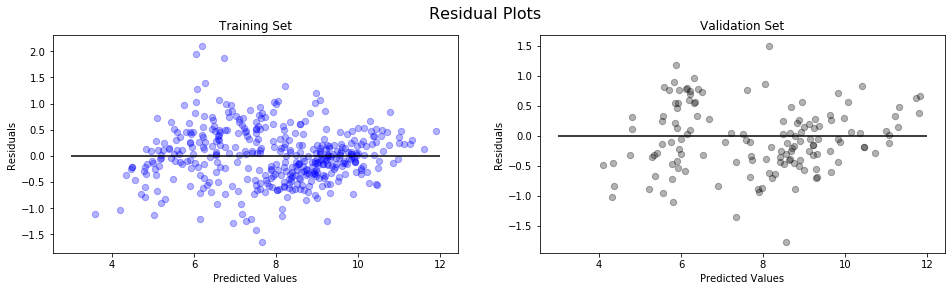

In [224]:
residual_plots (X2_train,X2_val,y_train,y_val)

In [225]:
#Final model for the Premier League due to its high predictability, let's calculate the scores for the test set
print(f'Linear Regression test R^2: {lm.score(X2_test, y_test):.3f}')
print (f'Linear Regression test Adjusted R^2: {1 - (1-lm.score(X2_test, y_test))*(len(y_test)-1)/(len(y_test)-X2_test.shape[1]-1):.3f}')

Linear Regression test R^2: 0.872
Linear Regression test Adjusted R^2: 0.821


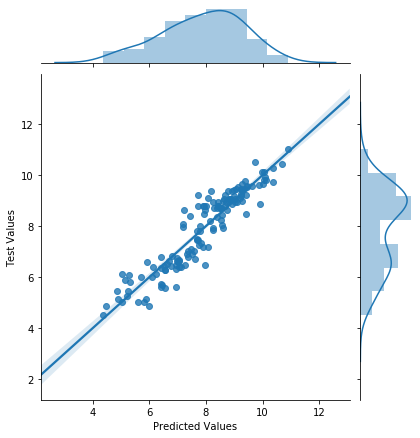

In [226]:
predicted_bar = sns.jointplot(pred_test, y_test, kind="regplot")
plt.ylabel ('Test Values')
plt.xlabel ('Predicted Values')
predicted_bar.savefig('predicted_bar.svg')

In [227]:
# Let's repeat the previous graph but now in the original data scale (000' Euros)
pred_test_exp = np.exp(pred_test)

In [228]:
y_test_exp = np.exp(y_test)

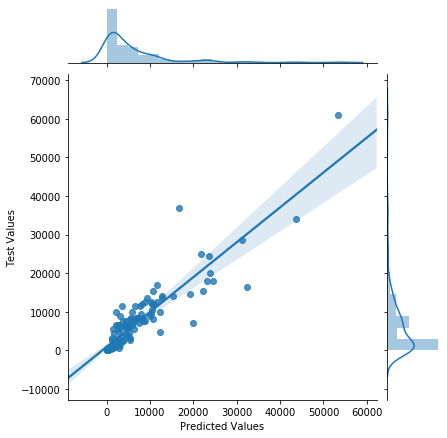

In [229]:
predicted_bar = sns.jointplot(pred_test_exp, y_test_exp, kind="regplot")
plt.ylabel ('Test Values')
plt.xlabel ('Predicted Values')
predicted_bar.savefig('predicted_bar.svg')

In [82]:
# Let's now predict the value for one of my favorite soccer players in the Premier League: Gabriel Jesus 189250
premier_df[premier_df["Name"]=="Gabriel Jesus"]

,ID,Name,Age,Country,Position,Team,League,Value,Salary,Reactions,...,Agility,Penalties,Crossing,Acceleration,Sprint Speed,Strength,Aggression,Heading Accuracy,Jumping,Log_Value
1412,230666,Gabriel Jesus,21,Brazil,ST,Manchester City,English Premier League,37500.0,130000,85,...,92,78,66,87,85,68,73,75,77,10.532096


In [83]:
test_input_x = np.array(X2.loc[1412, : ]).reshape(1, -1)

In [84]:
pred_jesus = lm.predict(test_input_x)

In [193]:
pred_jesus.shape

(1,)

In [85]:
print(math.exp(pred_jesus)) 

40787.62691761025


###  Let's continue with the Spain Primera Division

In [86]:
spain_df = small_df[small_df.League == "Spain Primera Division"] 

In [87]:
#Separate our features from our target
X = spain_df.loc[:,['Age','Reactions','Composure','Vision','Short Passing', 'Long Passing',
                    'Stamina','Shot Power','Volleys','Ball Control','Long Shots',
                    'Curve','Finishing','FK Accuracy','Dribbling','Positioning','Agility',
                    'Penalties', 'Crossing','Acceleration','Sprint Speed','Strength',
                   'Aggression','Heading Accuracy','Jumping']]

y = spain_df['Log_Value']

In [88]:
spain_df.shape

(660, 34)

In [89]:
# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [90]:
#further partition X, y into datasets X_train, y_train (60% of original) and X_val, y_val (20%).
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [91]:
print(X_train.shape, X_val.shape, X_test.shape)

(396, 25) (132, 25) (132, 25)


In [92]:
X_train.columns

Index(['Age', 'Reactions', 'Composure', 'Vision', 'Short Passing',
       'Long Passing', 'Stamina', 'Shot Power', 'Volleys', 'Ball Control',
       'Long Shots', 'Curve', 'Finishing', 'FK Accuracy', 'Dribbling',
       'Positioning', 'Agility', 'Penalties', 'Crossing', 'Acceleration',
       'Sprint Speed', 'Strength', 'Aggression', 'Heading Accuracy',
       'Jumping'],
      dtype='object')

In [93]:
#set up the  model:
lm = LinearRegression()

In [94]:
#fit and validate
linear_regression_fit_score (X_train,X_val,y_train,y_val)

Linear Regression train R^2: 0.834
Linear Regression train Adjusted R^2: 0.823

Linear Regression val R^2: 0.840
Linear Regression val Adjusted R^2: 0.802



The highest R^2 for validation suggests that the training model is slightly underfitted, let's add some complexity.

In [95]:
#Separate our features from our target
X2 = spain_df.loc[:,['Age','Reactions','Composure','Vision','Short Passing', 'Long Passing',
                    'Stamina','Shot Power','Volleys','Ball Control','Long Shots',
                    'Curve','Finishing','FK Accuracy','Dribbling','Positioning','Agility',
                    'Penalties', 'Crossing','Acceleration','Sprint Speed','Strength',
                   'Aggression','Heading Accuracy','Jumping']]

y = spain_df['Log_Value']

In [96]:
X2['Position'] = spain_df['Position']

In [97]:
X2 = pd.get_dummies(X2)

In [98]:
# hold out 20% of the data for final testing
X2, X2_test, y, y_test = train_test_split(X2, y, test_size=.2, random_state=10)

In [99]:
#further partition X, y into datasets X_train, y_train (60% of original) and X_val, y_val (20%).
X2_train, X2_val, y_train, y_val = train_test_split(X2, y, test_size=.25, random_state=3)

In [100]:
print(X2_train.shape, X2_val.shape, X2_test.shape)

(396, 40) (132, 40) (132, 40)


In [101]:
X2_train.columns

Index(['Age', 'Reactions', 'Composure', 'Vision', 'Short Passing',
       'Long Passing', 'Stamina', 'Shot Power', 'Volleys', 'Ball Control',
       'Long Shots', 'Curve', 'Finishing', 'FK Accuracy', 'Dribbling',
       'Positioning', 'Agility', 'Penalties', 'Crossing', 'Acceleration',
       'Sprint Speed', 'Strength', 'Aggression', 'Heading Accuracy', 'Jumping',
       'Position_CAM', 'Position_CB', 'Position_CDM', 'Position_CF',
       'Position_CM', 'Position_GK', 'Position_LB', 'Position_LM',
       'Position_LW', 'Position_LWB', 'Position_RB', 'Position_RM',
       'Position_RW', 'Position_RWB', 'Position_ST'],
      dtype='object')

In [102]:
#set up the  model:
lm = LinearRegression()

In [103]:
#fit and validate
linear_regression_fit_score (X2_train,X2_val,y_train,y_val)

Linear Regression train R^2: 0.892
Linear Regression train Adjusted R^2: 0.880

Linear Regression val R^2: 0.876
Linear Regression val Adjusted R^2: 0.822



In [104]:
pred_train = lm.predict(X2_train)
pred_val = lm.predict(X2_val)
pred_test = lm.predict(X2_test)

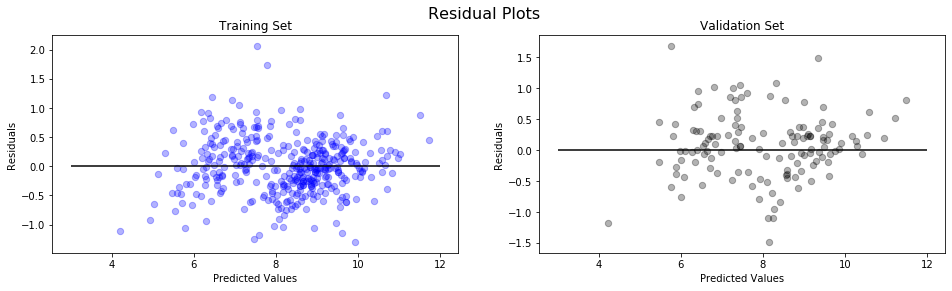

In [105]:
residual_plots (X2_train,X2_val,y_train,y_val)

In [106]:
pd.DataFrame(zip(X2_train.columns,lm.coef_),columns =['Features','Coefficients']).sort_values(by="Coefficients",
                ascending=False).reset_index(drop=True)

,Features,Coefficients
0,Position_GK,3.827040
1,Position_CB,0.303630
2,Reactions,0.060826
3,Short Passing,0.035038
4,Composure,0.025055
5,Acceleration,0.021391
6,Stamina,0.018445
7,Strength,0.015094
8,Ball Control,0.014361
9,Finishing,0.010662


In [107]:
#Final model for the Spanish League due to its high predictability, let's calculate the scores for the test set
print(f'Linear Regression test R^2: {lm.score(X2_test, y_test):.3f}')
print (f'Linear Regression test Adjusted R^2: {1 - (1-lm.score(X2_test, y_test))*(len(y_test)-1)/(len(y_test)-X2_test.shape[1]-1):.3f}')

Linear Regression test R^2: 0.904
Linear Regression test Adjusted R^2: 0.862


In [108]:
# Let's now predict the value for one of my favorite soccer players in the Premier League: Roberto Rosales
spain_df[spain_df["Name"]=="K. Benzema"]

,ID,Name,Age,Country,Position,Team,League,Value,Salary,Reactions,...,Agility,Penalties,Crossing,Acceleration,Sprint Speed,Strength,Aggression,Heading Accuracy,Jumping,Log_Value
201,165153,K. Benzema,30,France,ST,Real Madrid,Spain Primera Division,43000.0,265000,85,...,77,82,75,78,76,80,65,80,73,10.668955


In [109]:
test_input_x = np.array(X2.loc[201, : ]).reshape(1, -1)

In [110]:
pred_benzema = lm.predict(test_input_x)

In [111]:
print(math.exp(pred_benzema)) 

55068.04355737492


### Let's continue with the Italian Serie A

In [112]:
italy_df = small_df[small_df.League == "Italian Serie A"] 

In [113]:
italy_df.columns

Index(['ID', 'Name', 'Age', 'Country', 'Position', 'Team', 'League', 'Value',
       'Salary', 'Reactions', 'Composure', 'Vision', 'Short Passing',
       'Long Passing', 'Stamina', 'Ball Control', 'Shot Power', 'Volleys',
       'Long Shots', 'Curve', 'Finishing', 'FK Accuracy', 'Dribbling',
       'Positioning', 'Agility', 'Penalties', 'Crossing', 'Acceleration',
       'Sprint Speed', 'Strength', 'Aggression', 'Heading Accuracy', 'Jumping',
       'Log_Value'],
      dtype='object')

In [114]:
#Separate our features from our target
X = italy_df.loc[:,['Age','Reactions','Composure','Vision','Short Passing', 'Long Passing',
                    'Stamina','Shot Power','Volleys','Ball Control','Long Shots',
                    'Curve','Finishing','FK Accuracy','Dribbling','Positioning','Agility',
                    'Penalties', 'Crossing','Acceleration','Sprint Speed','Strength',
                   'Aggression','Heading Accuracy','Jumping']]

y = italy_df['Log_Value']

In [115]:
X.shape

(596, 25)

In [116]:
# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [117]:
#further partition X, y into datasets X_train, y_train (60% of original) and X_val, y_val (20%).
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [118]:
print(X_train.shape, X_val.shape, X_test.shape)

(357, 25) (119, 25) (120, 25)


In [119]:
italy_df.Log_Value.mean()

8.087444564024016

In [120]:
#set up the  model:
lm = LinearRegression()

In [121]:
#fit and validate
linear_regression_fit_score (X_train,X_val,y_train,y_val)

Linear Regression train R^2: 0.824
Linear Regression train Adjusted R^2: 0.811

Linear Regression val R^2: 0.731
Linear Regression val Adjusted R^2: 0.659



In [122]:
pd.DataFrame(zip(X2.columns,lm.coef_),columns =['Features','Coefficients']).sort_values(by="Coefficients",
                ascending=False).reset_index(drop=True)

,Features,Coefficients
0,Reactions,0.125416
1,Strength,0.025696
2,Ball Control,0.015765
3,Composure,0.014114
4,Sprint Speed,0.013012
5,Long Passing,0.010669
6,Dribbling,0.009812
7,Volleys,0.008726
8,Finishing,0.007135
9,Shot Power,0.006527


In [123]:
pred_train = lm.predict(X_train)
pred_val = lm.predict(X_val)
pred_test = lm.predict(X_test)

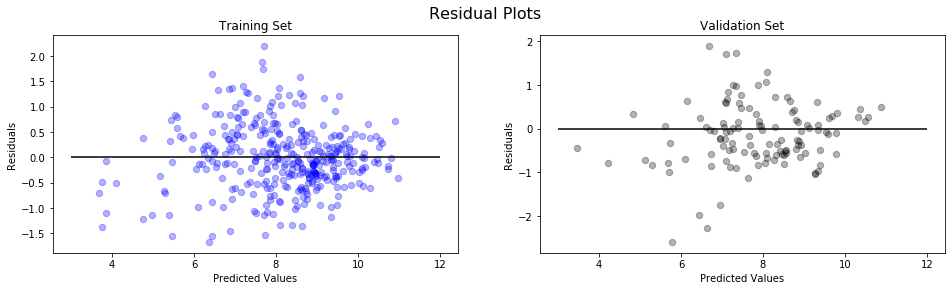

In [124]:
residual_plots (X_train,X_val,y_train,y_val)

In [125]:
#Separate our features from our target
X2 = italy_df.loc[:,['Age','Reactions','Composure','Vision','Short Passing', 'Long Passing',
                    'Stamina','Shot Power','Volleys','Ball Control','Long Shots',
                    'Curve','Finishing','FK Accuracy','Dribbling','Positioning','Agility',
                    'Penalties', 'Crossing','Acceleration','Sprint Speed','Strength',
                   'Aggression','Heading Accuracy','Jumping']]

y = italy_df['Log_Value']

In [126]:
X2['Position'] = italy_df['Position']

In [127]:
X2 = pd.get_dummies(X2)

In [128]:
# hold out 20% of the data for final testing
X2, X2_test, y, y_test = train_test_split(X2, y, test_size=.2, random_state=10)

In [129]:
#further partition X, y into datasets X_train, y_train (60% of original) and X_val, y_val (20%).
X2_train, X2_val, y_train, y_val = train_test_split(X2, y, test_size=.25, random_state=3)

In [130]:
#set up the  model:
lm = LinearRegression()

In [131]:
#fit and validate
linear_regression_fit_score (X2_train,X2_val,y_train,y_val)

Linear Regression train R^2: 0.878
Linear Regression train Adjusted R^2: 0.863

Linear Regression val R^2: 0.793
Linear Regression val Adjusted R^2: 0.695



In [132]:
pred_train = lm.predict(X2_train)
pred_val = lm.predict(X2_val)
pred_test = lm.predict(X2_test)

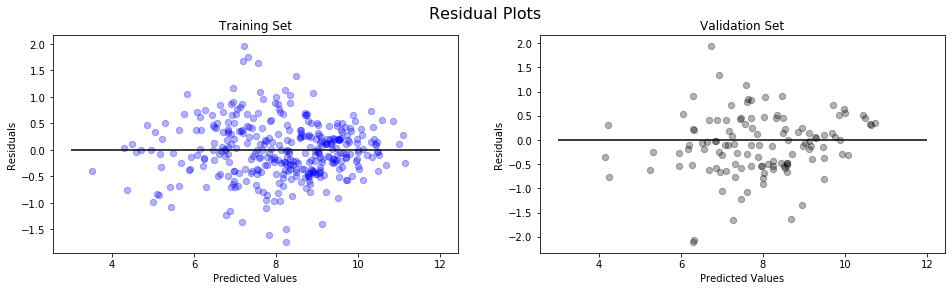

In [133]:
residual_plots (X2_train,X2_val,y_train,y_val)

After we added the categorical values to the latest model the R^2 is significantly higher 
for train than validation which suggests the model is overfitted, let's reduce this complexity:

In [134]:
## This step fits the Standard Scaler to the training data
## Essentially it finds the mean and standard deviation of each variable in the training set

std = StandardScaler()
std.fit(X2_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [135]:
## This step applies the scaler to the train set.
## It subtracts the mean it learned in the previous step and then divides by the standard deviation

X2_train_scaled = std.transform(X2_train.values)

In [136]:
## Apply the scaler to the validation set

X2_val_scaled = std.transform(X2_val.values)

In [137]:
## Apply the scaler to the test set

X2_test_scaled = std.transform(X2_test.values)

In [138]:
for alpha in range(-3,2):

    print('\nAlpha:', alpha)
    
    lasso = Lasso(10**alpha)
    
    lasso.fit(X2_train_scaled, y_train)

    #validate
    print(f'Linear Regression train R^2: {lasso.score(X2_train_scaled, y_train):.3f}')
    print (f'Linear Regression train Adjusted R^2: {1 - (1-lasso.score(X2_train_scaled, y_train))*(len(y_train)-1)/(len(y_train)-X2_train_scaled.shape[1]-1):.3f}')
    print("")
    print(f'Linear Regression val R^2: {lasso.score(X2_val_scaled, y_val):.3f}')
    print (f'Linear Regression val Adjusted R^2: {1 - (1-lasso.score(X2_val_scaled, y_val))*(len(y_val)-1)/(len(y_val)-X2_val_scaled.shape[1]-1):.3f}')
    print("")


Alpha: -3
Linear Regression train R^2: 0.878
Linear Regression train Adjusted R^2: 0.863

Linear Regression val R^2: 0.794
Linear Regression val Adjusted R^2: 0.696


Alpha: -2
Linear Regression train R^2: 0.872
Linear Regression train Adjusted R^2: 0.857

Linear Regression val R^2: 0.794
Linear Regression val Adjusted R^2: 0.697


Alpha: -1
Linear Regression train R^2: 0.776
Linear Regression train Adjusted R^2: 0.749

Linear Regression val R^2: 0.701
Linear Regression val Adjusted R^2: 0.559


Alpha: 0
Linear Regression train R^2: 0.272
Linear Regression train Adjusted R^2: 0.185

Linear Regression val R^2: 0.266
Linear Regression val Adjusted R^2: -0.083


Alpha: 1
Linear Regression train R^2: 0.000
Linear Regression train Adjusted R^2: -0.119

Linear Regression val R^2: -0.009
Linear Regression val Adjusted R^2: -0.488



In [139]:
#Best LASSO

In [140]:
best_alpha = 10**-2
best_lasso = Lasso(10**-2)
best_lasso.fit(X2_train_scaled, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [141]:
best_lasso.score(X2_val_scaled, y_val)

0.7943609705106432

In [142]:
best_lasso.intercept_

8.139289912394336

In [143]:
best_lasso.coef_

array([-0.3488958 ,  0.87275805,  0.21767344,  0.03064175,  0.        ,
        0.09723658,  0.02346899,  0.        ,  0.03728322,  0.60669236,
       -0.        ,  0.        ,  0.03172959, -0.02779129,  0.18850124,
       -0.        ,  0.        , -0.08852851, -0.        ,  0.        ,
        0.22160456,  0.21815168, -0.        ,  0.14499385,  0.        ,
       -0.        ,  0.28833706, -0.03049947, -0.        , -0.04998375,
        0.9932613 , -0.05386142, -0.        ,  0.06212721, -0.03639735,
        0.02809445,  0.04846139,  0.        ])

In [144]:
italy_lasso_coefficients = pd.DataFrame(zip(X2_train.columns,best_lasso.coef_),columns =['Features','Coefficients']).sort_values(by="Coefficients",
                ascending=False).reset_index(drop=True)

Let's now run a linear regression excluding those factors zeroed by Lasso

In [145]:
selected_columns = ['Position_GK', 'Reactions', 'Ball Control', 'Position_CB', 'Sprint Speed',
       'Strength', 'Composure', 'Dribbling', 'Heading Accuracy', 'Long Passing',
       'Position_LW', 'Position_RW', 'Volleys', 'Finishing', 'Vision',
       'Position_RM', 'Stamina', 'FK Accuracy', 'Position_CDM', 'Position_RB',
       'Position_CM', 'Position_LB', 'Penalties', 'Age']

In [146]:
# Let's get the training, validation and test sets from the previous model
X3_train, X3_val, X3_test = X2_train.copy()[selected_columns],X2_val.copy()[selected_columns],X2_test.copy()[selected_columns]

In [147]:
print(X3_train.shape, X3_val.shape, X3_test.shape)

(357, 24) (119, 24) (120, 24)


In [148]:
#set up the  model:
lm = LinearRegression()

In [149]:
#fit and validate
linear_regression_fit_score(X3_train,X3_val,y_train,y_val)

Linear Regression train R^2: 0.876
Linear Regression train Adjusted R^2: 0.867

Linear Regression val R^2: 0.791
Linear Regression val Adjusted R^2: 0.737



In [150]:
pred_train = lm.predict(X3_train)
pred_val = lm.predict(X3_val)
pred_test = lm.predict(X3_test)

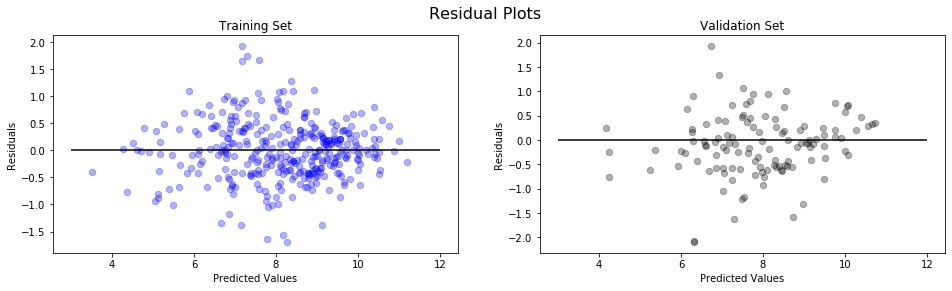

In [151]:
residual_plots (X3_train,X3_val,y_train,y_val)

In [152]:
italy_coefficients = pd.DataFrame(zip(X3_train.columns,lm.coef_),columns =['Features','Coefficients']).sort_values(by="Coefficients",
                ascending=False).reset_index(drop=True)
italy_coefficients 

,Features,Coefficients
0,Position_GK,3.871603
1,Position_CB,0.908510
2,Position_LW,0.439718
3,Position_RW,0.323983
4,Position_RM,0.224172
5,Reactions,0.086413
6,Ball Control,0.038600
7,Strength,0.017879
8,Sprint Speed,0.015683
9,Composure,0.015431
